# Assignment 5

## 1. Load data and install relavent packages

In [17]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.datasets import load_iris
import pandas as pd
import scipy.cluster.hierarchy as shc  
import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans

In [19]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
# Keep only Sepal Length and Sepal Width
df = df[['sepal length (cm)','sepal width (cm)']]
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


## 2. Draw Dendrogram using Ward Method

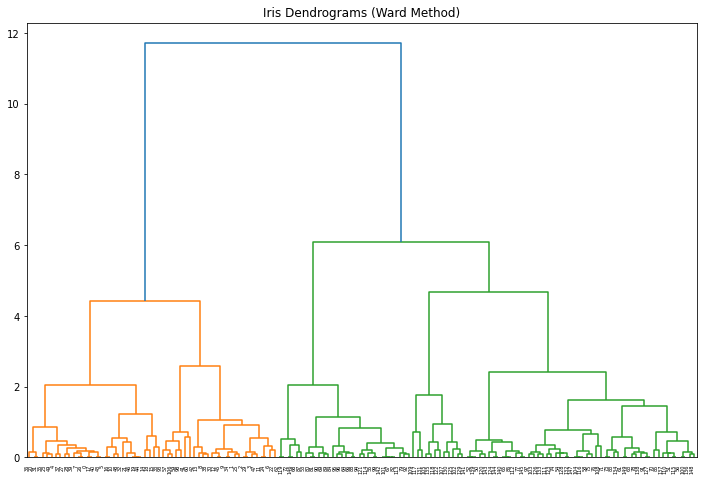

In [20]:
plt.figure(figsize=(12, 8))  
plt.title("Iris Dendrograms (Ward Method)")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))  
plt.xticks(rotation=90, fontsize=5, ha='right')  
plt.show()  

## Step 3: Using dentrogram to determine a few number of clusters (k)

In a dendrogram, the longest vertical distances represent the most significant merges, indicating where clusters are most distinct before being combined. Based on the dendrogram above, notable vertical gaps occur at:

- Blue line: height 4-12
- Green line: height 2-6
- Orange line: height 2-4
- Orange line: height 1-3

Drawing horizontal lines at these heights can help determine the optimal number of clusters, k.


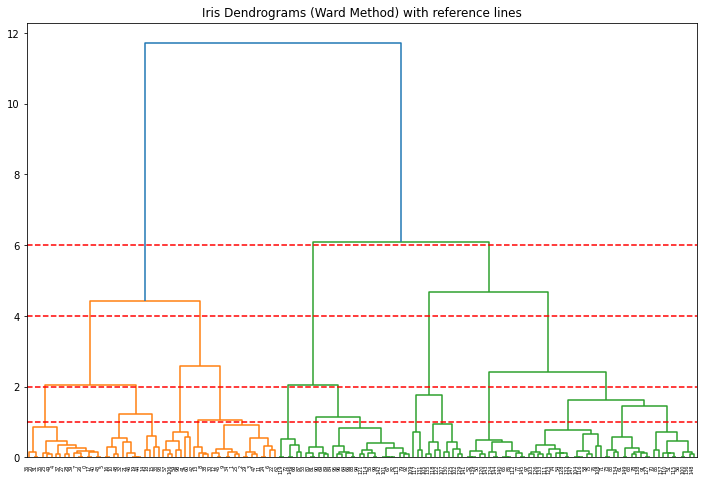

In [21]:
plt.figure(figsize=(12, 8))  
plt.title("Iris Dendrograms (Ward Method) with reference lines")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))  
plt.xticks(rotation=90, fontsize=5, ha='right')  

heights = [6, 4, 2, 1]  # Heights based on identified vertical gaps  
for height in heights:  
    plt.axhline(y=height, color='r', linestyle='--')  

plt.show()  

- Height 6: intersects 3 vertical lines, suggesting 3 clusters
- Height 4: intersects 5 vertical lines, suggesting 5 clusters
- Height 2: intersects 5 vertical lines, suggesting 9 clusters
- Height 1: intersects 5 vertical lines, suggesting 15 clusters

## Stpe 4: Show the clusters for the 4 k values chosen above for Ward and Comlete linkage side by side

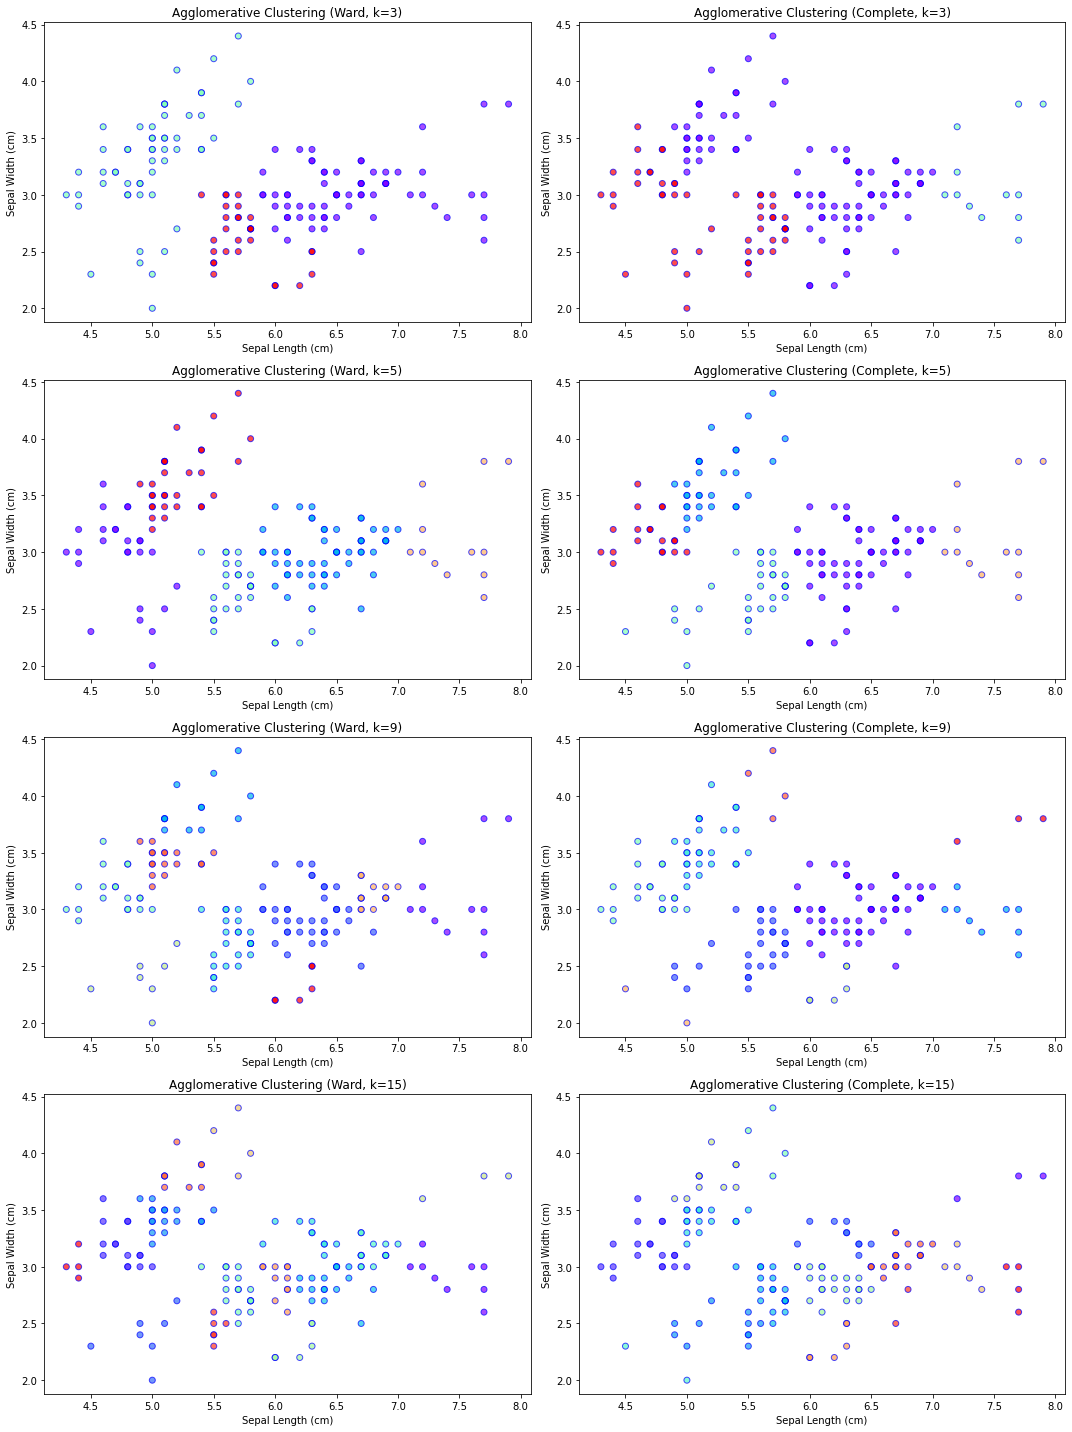

In [22]:
def plot_clusters(data, labels, title, ax):  
    scatter = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')  
    ax.set_xlabel('Sepal Length (cm)')  
    ax.set_ylabel('Sepal Width (cm)')  
    ax.set_title(title)  
    return scatter  

k_values = [3, 5, 9, 15]  

fig, axes = plt.subplots(len(k_values), 2, figsize=(15, 20))  
  
for i, k in enumerate(k_values):  
    # Ward linkage  
    ward = AgglomerativeClustering(n_clusters=k, linkage='ward')  
    ward_labels = ward.fit_predict(df)  
    plot_clusters(df, ward_labels, f'Agglomerative Clustering (Ward, k={k})', axes[i, 0])  
      
    # Complete linkage  
    complete = AgglomerativeClustering(n_clusters=k, linkage='complete')  
    complete_labels = complete.fit_predict(df)  
    plot_clusters(df, complete_labels, f'Agglomerative Clustering (Complete, k={k})', axes[i, 1])  
  
# Adjust layout  
plt.tight_layout()  
plt.show()  
 

## Step 5: Implement k-means clustering using the same number of clusters, and show the clusters in 2d scatter plot

Modified the plot_clusters function from before to show centers for k-mean

In [23]:
def plot_clusters_kmeans(data, labels, centers, title, ax):  
    scatter = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')  
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='X')  # Plot cluster centers  
    ax.set_xlabel('Sepal Length (cm)')  
    ax.set_ylabel('Sepal Width (cm)')  
    ax.set_title(title)  
    return scatter  ## Step 5 

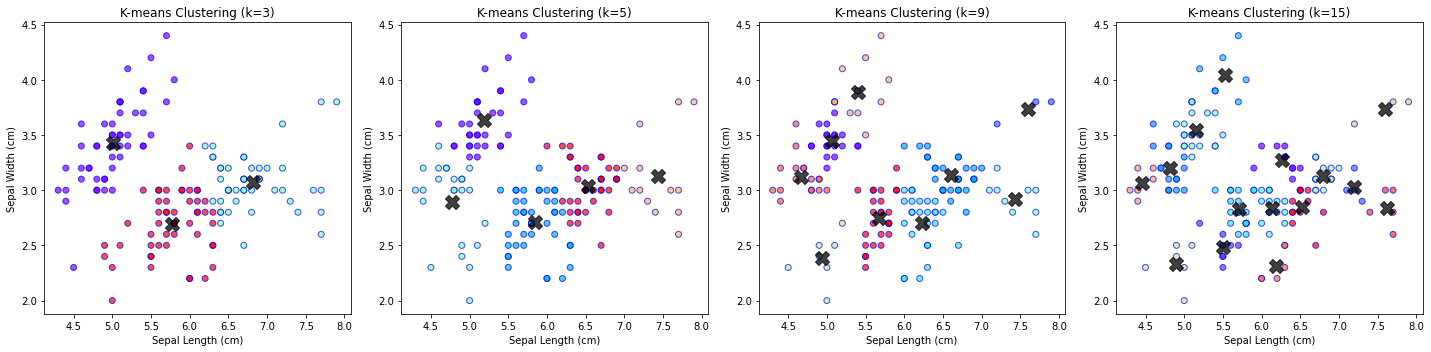

In [24]:
# Create subplots  
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5))  
  
for i, k in enumerate(k_values):  
    # K-means clustering  
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans_labels = kmeans.fit_predict(df)  
    centers = kmeans.cluster_centers_  
    plot_clusters_kmeans(df, kmeans_labels, centers, f'K-means Clustering (k={k})', axes[i])  
  
# Adjust layout  
plt.tight_layout()  
plt.show()  

### 1.Based on the scatter plot of the clustered data, which makes the most sense? Give logical interpretation from the clusters.

Based on the scatter plots, the clustering that makes the most sense appears to be clustering with k=3 for k-means. The data seems to form three well-defined groups with minimal oerlap when visualized.
With k=3, K-means clearly separates these three clusters, which likely correspond to three different iris species

### 2.Comparing Euclidean distance (Ward method) and complete linkage in agglomerative clustering

- Both methods seems to have the best clustering when k=3, which aligns well with the K-means results.
- the complete linkage seems to be more sensitive to outliers. When outlier presents, it forms very small clusters
- As k increases, the Ward method tends to create more balanced clusters, while complete linkage sometimes results in smaller, isolated clusters.


### 3 Comparing the scatter plots from Agglomerative and K-Means clustering

- Similarly,both methods successfully identify the three main clusters.
- Agglomerative clustering, especially with the Ward method, maintains the core structure of the three main clusters even at higher k values, only gradually breaking them apart.
- K-means seems more sensitive to the choice of k, with cluster boundaries changing more dramatically as k increases.
- Agglomerative clustering provides a more hierarchical view of the data structure compare to k-means, which can be useful for understanding relationships between sub-clusters.